In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
plt.style.use("seaborn-v0_8")
data = pd.read_csv("heart.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
data.shape

(920, 16)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [15]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [24]:
data.rename(columns={"thalch": "thalach"}, inplace=True)
data["target"] = data["num"].apply(lambda x: 0 if x == 0 else 1)
data.drop(columns=["id", "dataset", "num"], inplace=True)

In [25]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

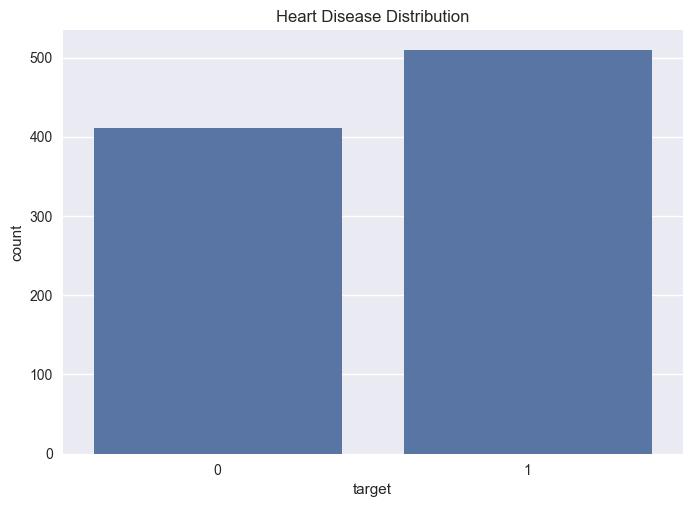

In [26]:
sns.countplot(x="target", data=data)
plt.title("Heart Disease Distribution")
plt.show()

In [27]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


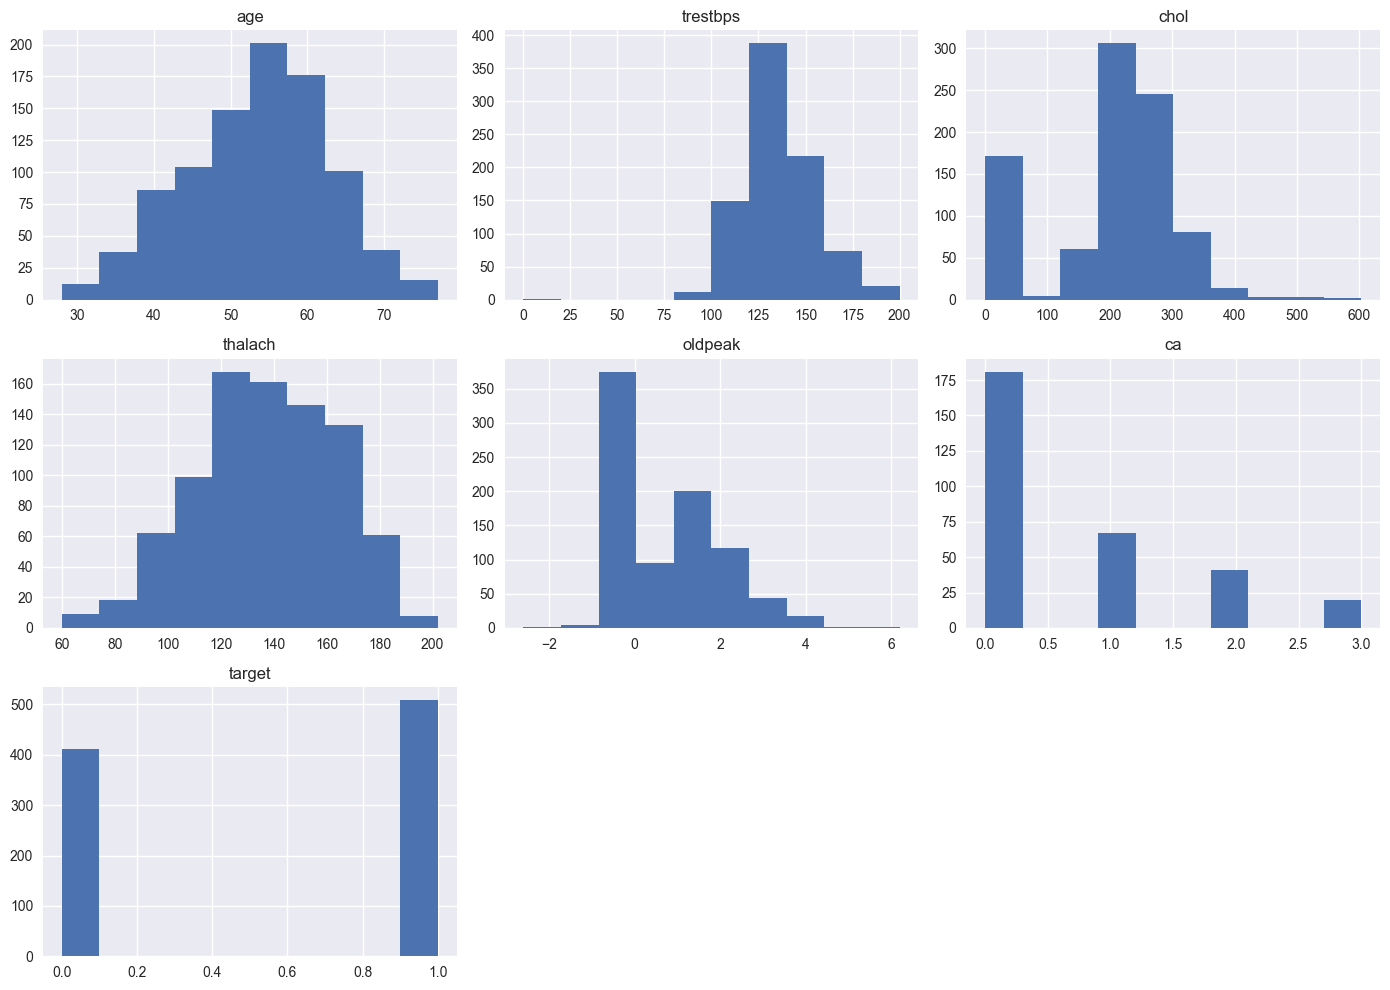

In [28]:
data.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

In [ ]:
data["sex"] = data["sex"].map({"Male": 1, "Female": 0})


In [35]:
le = LabelEncoder()

categorical_cols = data.select_dtypes(include=["object"]).columns
categorical_cols
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

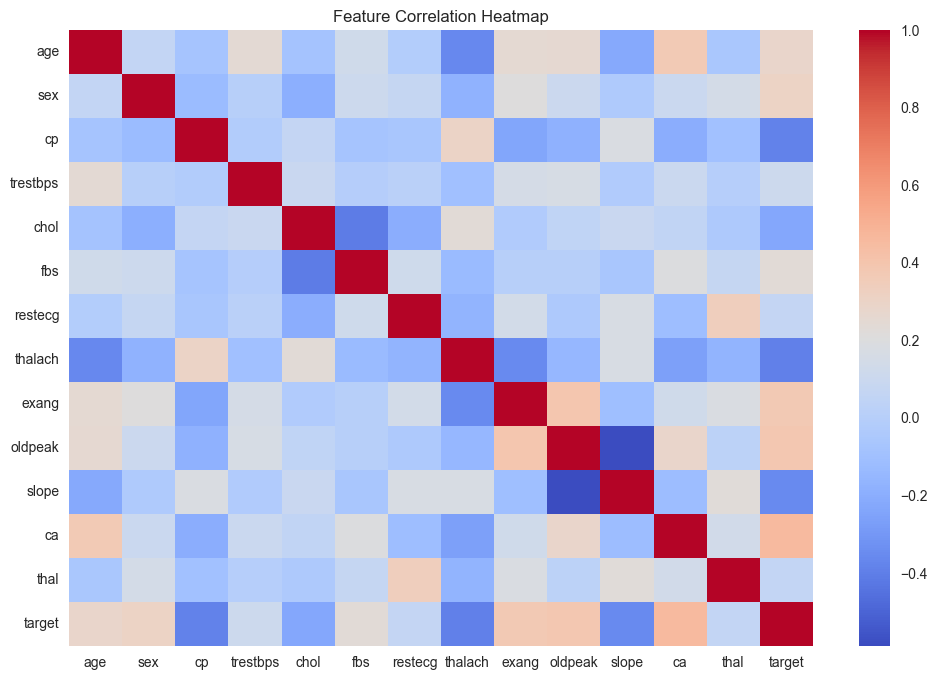

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


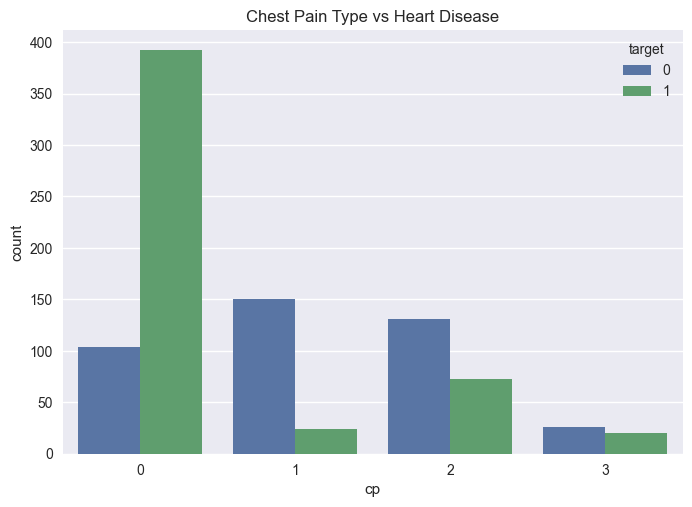

In [37]:
sns.countplot(x="cp", hue="target", data=data)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

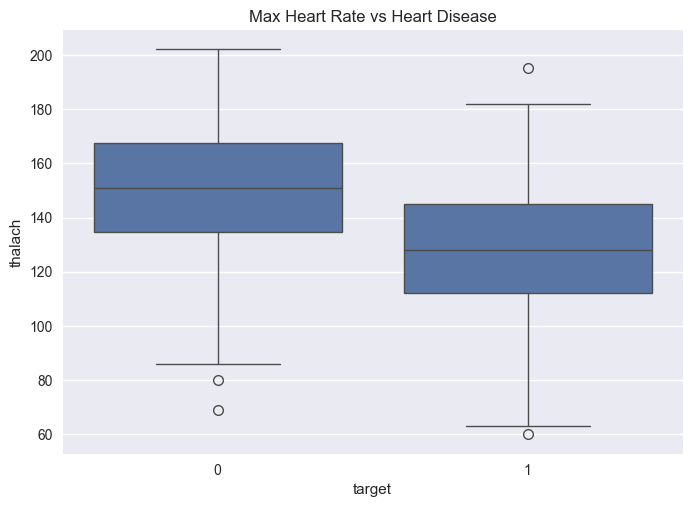

In [38]:
sns.boxplot(x="target", y="thalach", data=data)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

In [39]:
selected_features = [
    "age", "sex", "cp", "trestbps",
    "chol", "thalach", "exang", "oldpeak"
]

selected_features


['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak']

In [40]:
X = data[selected_features]
y = data["target"]

print(X.shape, y.shape)

(920, 8) (920,)


In [42]:
cleaned_data = data[selected_features + ["target"]]
cleaned_data.to_csv("heart_cleaned.csv", index=False)
